In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importing CSVs and Creating Dataframe

In [2]:
#creating loop to grab csv files with data from 2019-2022

directory = r'C:\Users\NickBowen\Documents\NFL Data'

df_list = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        print(filename)
        filepath = os.path.join(directory,filename)
        df = pd.read_csv(filepath)
        year = filename.split('_')[0]
        df['Year'] = year
        df_list.append(df)
        
df  = pd.concat(df_list, ignore_index=True)
        
        
        

2019_NFL_COMBINE.csv
2020_NFL_COMBINE.csv
2021_NFL_COMBINE.csv
2022_NFL_COMBINE.csv


# Cleaning up Column Names

In [3]:
df.columns
#creating concatenated week and year column

df['Week with Year'] = df['Date'] + ' ' + df['Year']

df.head()

,Unnamed: 0,Week,Day,Date,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,...,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Week with Year
0,0,1,Sun,8-Sep,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,...,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,8-Sep 2019
1,1,2,Sun,15-Sep,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,...,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,15-Sep 2019
2,2,3,Sun,22-Sep,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,...,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,22-Sep 2019
3,3,4,NaN,NaN,NaN,Bye Week,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers,2019,NaN
4,4,5,Mon,7-Oct,W,Cleveland Browns,31.0,3.0,22.0,446.0,...,180.0,78.0,102.0,4.0,12.38,22.56,-10.50,San Francisco 49ers,2019,7-Oct 2019


In [4]:
#renaming columns; ID and win/loss
df.rename(columns={'Unnamed: 0': 'NFLWeekRowID','Day':'Day of Week','Unnamed: 5':'Win/Loss','Opp':'Opponent','Tm':'Points Scored','Opp.1':'Points Allowed','1stD':'First Downs','TotYd':'Total Yards','PassY':'Pass Yards','RushY':'Rush Yards','TO':'Turn Overs','1stD.1':'First Downs Allowed','TotYd.1':'Total Yards Allowed','PassY.1':'Pass Yards Allowed','RushY.1':'Rush Yards Allowed','TO.1':'Turnovers Forced','Offense':'Offense Rank','Defense':'Defense Rank','Sp. Tms':'Special Teams Rank','Home_team':'Team'}, inplace=True)

In [5]:
df.columns

num_rows = len(df)
print(num_rows)

2282


# Data Preparation
**Analyzing Columns for Missing Values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NFLWeekRowID         2282 non-null   int64  
 1   Week                 2243 non-null   object 
 2   Day of Week          2119 non-null   object 
 3   Date                 2158 non-null   object 
 4   Win/Loss             1750 non-null   object 
 5   Opponent             2243 non-null   object 
 6   Points Scored        1750 non-null   float64
 7   Points Allowed       1750 non-null   float64
 8   First Downs          1750 non-null   float64
 9   Total Yards          1750 non-null   float64
 10  Pass Yards           1750 non-null   float64
 11  Rush Yards           1750 non-null   float64
 12  Turn Overs           1261 non-null   float64
 13  First Downs Allowed  1750 non-null   float64
 14  Total Yards Allowed  1750 non-null   float64
 15  Pass Yards Allowed   1750 non-null   f

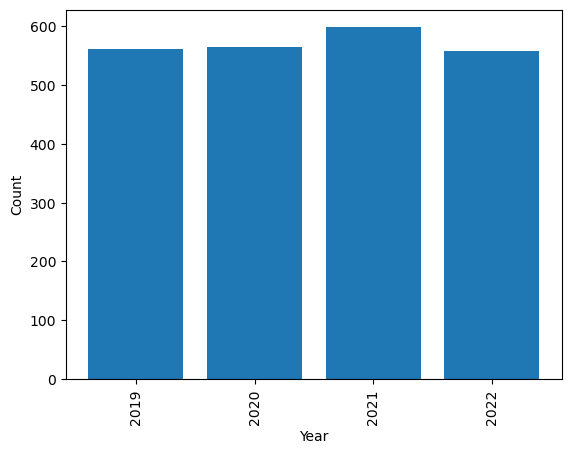

In [9]:
#row counts by year
row_counts = df.groupby('Year').agg({'NFLWeekRowID':'count'})
row_counts = row_counts.reset_index()

plt.bar(row_counts['Year'].astype(str), height=row_counts['NFLWeekRowID'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Filtering Dataframe down to 2019-2021
**2022 Data in incomplete**


In [11]:
#filtering out bye weeks
df_filter = df.loc[df['Opponent'] != 'Bye']

#filtering out random blanks from date = playoff
df_filter = df.loc[df['Date'] != 'Playoff']

#creating week filter values
excluded_weeks = ['Conf. Champ.','Division','SuperBowl','Wild Card']

included_year = ['2019','2020','2021']

#filtering out weeks
df_filter = df_filter[~df_filter['Week'].isin(excluded_weeks)]

#filtering on year to exclude 2022
df_filter = df_filter[df_filter['Year'].isin(included_year)]

In [12]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1723
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NFLWeekRowID         1651 non-null   int64  
 1   Week                 1612 non-null   object 
 2   Day of Week          1519 non-null   object 
 3   Date                 1558 non-null   object 
 4   Win/Loss             1519 non-null   object 
 5   Opponent             1612 non-null   object 
 6   Points Scored        1519 non-null   float64
 7   Points Allowed       1519 non-null   float64
 8   First Downs          1519 non-null   float64
 9   Total Yards          1519 non-null   float64
 10  Pass Yards           1519 non-null   float64
 11  Rush Yards           1519 non-null   float64
 12  Turn Overs           1096 non-null   float64
 13  First Downs Allowed  1519 non-null   float64
 14  Total Yards Allowed  1519 non-null   float64
 15  Pass Yards Allowed   1519 non-null   f

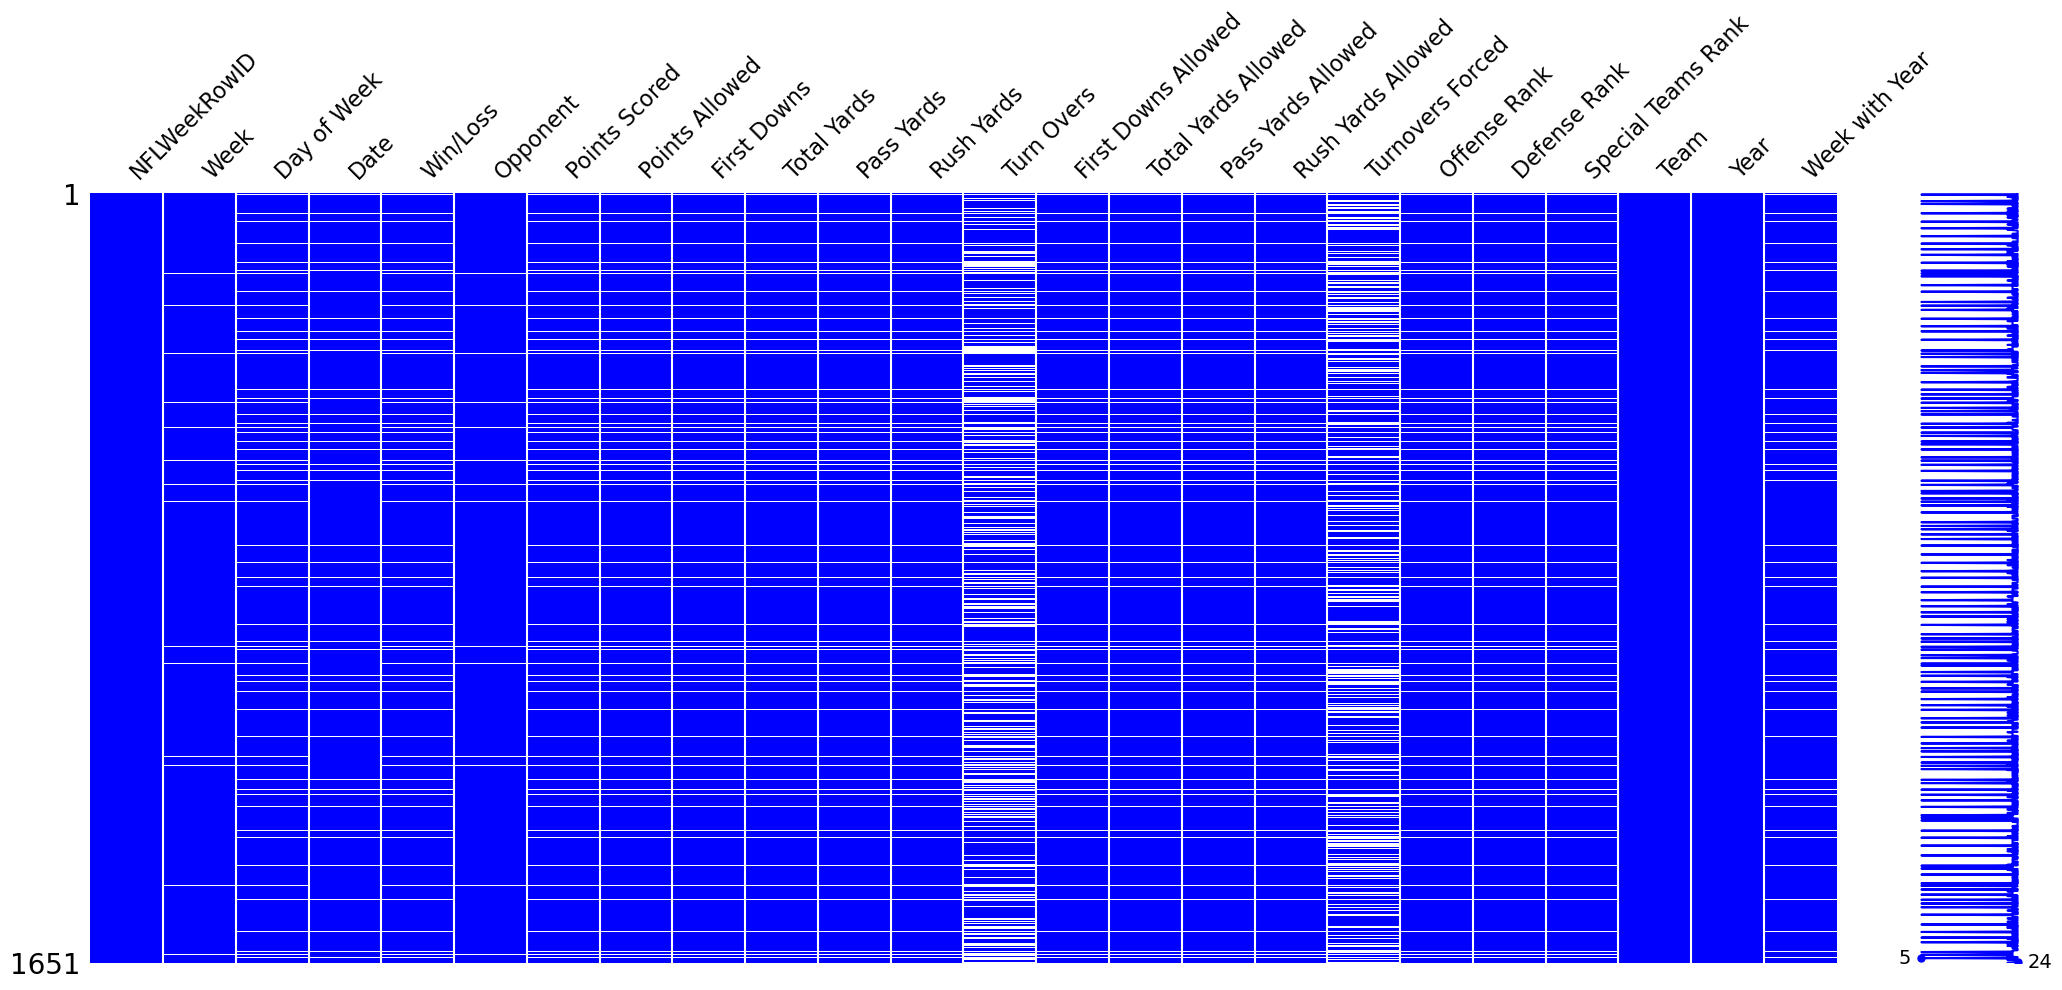

In [13]:
msno.matrix(df_filter, color=(0.0, 0.0, 1.0))
plt.show()

# Prepping Dataframe
**Replacing blank values for turnovers with 0**

**Dropping columns that are not needed for model**

**Dropping rows that have missing data**

In [14]:
#replacing missing values
df_filter['Turn Overs'].fillna(0, inplace=True)
df_filter['Turnovers Forced'].fillna(0, inplace=True)

# drop irrelevant columns
df_filter.drop(['NFLWeekRowID','Day of Week','Week with Year','Year','Week','Date','Win/Loss','Offense Rank','Defense Rank','Special Teams Rank'], axis=1, inplace=True)

print(df_filter)

                  Opponent  Points Scored  Points Allowed  First Downs  \
0     Tampa Bay Buccaneers           31.0            17.0         17.0   
1       Cincinnati Bengals           41.0            17.0         27.0   
2      Pittsburgh Steelers           24.0            20.0         26.0   
3                 Bye Week            NaN             NaN          NaN   
4         Cleveland Browns           31.0             3.0         22.0   
...                    ...            ...             ...          ...   
1719   Pittsburgh Steelers           36.0            28.0         22.0   
1720         Chicago Bears           17.0             9.0         13.0   
1721      Los Angeles Rams           23.0            30.0         19.0   
1722     Green Bay Packers           10.0            37.0         11.0   
1723         Chicago Bears           31.0            17.0         11.0   

      Total Yards  Pass Yards  Rush Yards  Turn Overs  First Downs Allowed  \
0           256.0       158.0    

In [23]:
# handle missing data
df_filter.dropna(inplace=True)
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1723
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Opponent             1519 non-null   int64  
 1   Points Scored        1519 non-null   float64
 2   Points Allowed       1519 non-null   float64
 3   First Downs          1519 non-null   float64
 4   Total Yards          1519 non-null   float64
 5   Pass Yards           1519 non-null   float64
 6   Rush Yards           1519 non-null   float64
 7   Turn Overs           1519 non-null   float64
 8   First Downs Allowed  1519 non-null   float64
 9   Total Yards Allowed  1519 non-null   float64
 10  Pass Yards Allowed   1519 non-null   float64
 11  Rush Yards Allowed   1519 non-null   float64
 12  Turnovers Forced     1519 non-null   float64
 13  Team                 1519 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 178.0 KB


# Model Creation
**Changing Categorical Variables into numerical values**

**Seperating features and target variable**

**Splitting data into training and test sets**

**Creating linear regression model**

In [34]:
# create a LabelEncoder object
le = LabelEncoder()

# encode the 'Opponent' column
df_filter['Opponent'] = le.fit_transform(df_filter['Opponent'])

# encode the 'Team' column
df_filter['Team'] = le.fit_transform(df_filter['Team'])


In [38]:
# separate features and target
X = df_filter.drop(['Points Scored', 'Points Allowed'], axis=1)
y = df_filter[['Points Scored', 'Points Allowed']]


In [42]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# create a Linear Regression model object
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred) #lower score is better; It measures the average squared difference between the predicted values and the true values
r2 = r2_score(y_test, y_pred) #higher score is better; 

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 37.40443212700906
R-squared: 0.6187386501600678


In [45]:
y_pred = np.squeeze(y_pred)

#y_pred = np.array(y_pred)
#y = np.array(y)

sns.residplot(y_pred, y, lowess=True, color="g")

C:\Users\NickBowen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: regplot inputs must be 1d